# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



### Нужно ознакомиться с данными,  [Ссылка](#shag_1)
### затем обработать предварительно,  [Ссылка](#shag_2)
### добавить новые дополнительные колонки,  [Ссылка](#shag_3)
### проанализировать всю выборку,  [Ссылка](#shag_4)
### избавиться от выбивающихся значений,  [Ссылка](#shag_5)
### сравнить центральную зону и остальную,  [Ссылка](#shag_6)
### и придти к каким-то выводам.  [Ссылка](#shag_5)

<a id='shag_1'></a>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import datetime

In [86]:
path = '/datasets/real_estate_data.csv'
flats_table = pd.read_csv(path, sep='\t')
display(flats_table.head(10))

print(flats_table.info())
print(flats_table['rooms'].value_counts())
print(flats_table['is_apartment'].value_counts())
print(flats_table['locality_name'].value_counts())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Пропущены значения у ceiling_height - высота потолков, living_area - жилая площадь, is_apartment - апартаменты, kitchen_area     - площадь кухни, balcony - балконы, cityCenters_nearest - расстояния до..(несколько), days_exposition - продолжительность размещения объявления. Из них уместно заполнить высоту потолков медианным значением.

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

<a id='shag_2'></a>

### Шаг 2. Предобработка данных

In [87]:
flats_table['is_apartment'] = flats_table['is_apartment'].fillna('False') 

flats_table.loc[flats_table['floors_total'].isnull()].dropna
flats_table['floors_total'] = pd.to_numeric(round(flats_table['floors_total'],0),downcast='integer')
display(flats_table.loc[flats_table['floors_total'].isnull()])

display(flats_table.sort_values('last_price').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,False,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,False,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,False,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,False,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,False,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,False,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,False,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,False,...,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,False,...,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0


In [88]:
print(flats_table['balcony'].value_counts())
flats_table.loc[flats_table['balcony'].isnull(),'balcony'] = 0

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [89]:
ceiling_height_median = flats_table['ceiling_height'].median()
flats_table['ceiling_height'] = flats_table['ceiling_height'].fillna(0).replace(0, ceiling_height_median)


In [90]:
flats_table['total_area'] = pd.to_numeric(round(flats_table['total_area'],-1))
flats_table['ceiling_height'] = pd.to_numeric(round(flats_table['ceiling_height'],1))
flats_table.loc[:,'cityCenters_nearest_km']=flats_table.loc[:,'cityCenters_nearest']//1000
flats_table['days_exposition'] = pd.to_numeric(round(flats_table['days_exposition'],-1))

<a id='shag_3'></a>

### Шаг 3. Посчитайте и добавьте в таблицу

In [91]:
flats_table['m2_price'] = flats_table['last_price']/flats_table['total_area']
flats_table['m2_price'] = pd.to_numeric(round(flats_table['m2_price'],2),downcast='integer')

In [92]:
flats_table['flat_floor'] = 'другой'
flats_table.loc[flats_table['floor']==1,'flat_floor'] = 'первый'
flats_table.loc[flats_table['floor']==flats_table['floors_total'],'flat_floor'] = 'последний'

<div class="alert alert-info">  Разделил этажи в зависимости от категории. </div>

In [93]:
flats_table['living/total'] = flats_table['living_area']/flats_table['total_area']
flats_table['kitchen/total'] = flats_table['kitchen_area']/flats_table['total_area']

<div class="alert alert-info">  Добавил показатель отношения жилой площади к общей площади и площади кухни к общей площади. </div>

In [94]:
print(flats_table['first_day_exposition'] )
flats_table['first_day_exposition']= pd.to_datetime(flats_table['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flats_table['month'] = pd.DatetimeIndex(flats_table['first_day_exposition']).month
flats_table['year'] = pd.DatetimeIndex(flats_table['first_day_exposition']).year
flats_table['dayofweek'] = pd.DatetimeIndex(flats_table['first_day_exposition']).dayofweek

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object


<div class="alert alert-info"> Добавил отдельные колонки для дня, месяца и года размещения объявления. </div>

<a id='shag_4'></a>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<div class="alert alert-info"> <b> Проанализируем весь массив данных </div>

In [95]:
def flats_table_paiting(parametr, parametr_name):
    flat_floor_m2_price = flats_table.pivot_table(index=parametr, values='m2_price', aggfunc=['mean'])
    print(flat_floor_m2_price)
    sns.relplot(data=flat_floor_m2_price, aspect=1.8)
    plt.title(parametr_name+' и цена за квадратный метр')
    plt.ylabel('Цена за квадратный метр, руб.')
    plt.xlabel(parametr_name)
    plt.show()  
    
def scatter_paiting(parametr, parametr_name):
    flat_floor_m2_price = spb_table.pivot_table(index=parametr, values='m2_price', aggfunc=['mean'])
    print(flat_floor_m2_price)
    sns.relplot(data=flat_floor_m2_price, aspect=1.8)
    plt.title(parametr_name+' и цена за квадратный метр')
    plt.ylabel('Цена за квадратный метр, руб.')
    plt.xlabel(parametr_name)
    plt.show()   
    
def box_paiting(parametr, parametr_name):
    box_parametr = pd.DataFrame(spb_table[parametr])
    plt.title('Диаграмма размаха')
    plt.ylabel(parametr_name)
    box_parametr.boxplot()
    plt.show()
    
def center_scatter_paiting(parametr, parametr_name, df, tittle):
    flat_floor_m2_price = df.pivot_table(index=parametr, values='m2_price', aggfunc=['mean'])
    #print(flat_floor_m2_price)
    sns.relplot(data=flat_floor_m2_price, aspect=1.8)
    plt.title(tittle)
    plt.ylabel('Цена за квадратный метр, руб.')
    plt.xlabel(parametr_name)
    plt.show()  

<div class="alert alert-info">  Вынесу повторяющийся код в отдельную функцию для рисования графиков </div>

                     mean
                 m2_price
total_area               
10.0        205433.333333
20.0        129510.174236
30.0        101384.998979
40.0         94614.565595
50.0         90029.772598
60.0         89312.485761
70.0         96191.780858
80.0        102347.631894
90.0        110037.779424
100.0       116707.849556
110.0       128070.535493
120.0       138403.512305
130.0       147356.311053
140.0       149137.916418
150.0       151219.912787
160.0       163553.418958
170.0       164531.991818
180.0       139649.719273
190.0       254009.973250
200.0       140155.659730
210.0       117622.447619
220.0       214122.909600
230.0       189303.696111
240.0       207394.745217
250.0       173613.906316
260.0       233912.692000
270.0       257596.164286
280.0       192389.658333
290.0       244051.724000
300.0       191404.600000
310.0       242811.060000
320.0       155625.000000
330.0        87878.790000
340.0       130196.076667
350.0       309857.140000
360.0       

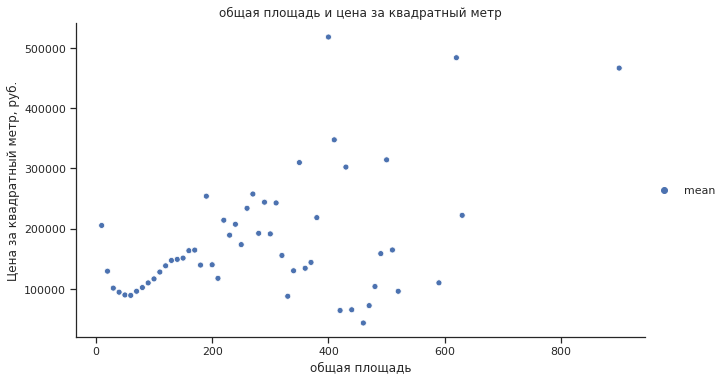

In [96]:
flats_table_paiting('total_area', 'общая площадь')

<div class="alert alert-info">  В целом до значения площади в 170 кв.м. наблюдается рост цены за кв.м., а далее - снижение. </div>

                mean
            m2_price
rooms               
0      111931.293858
1      101782.028616
2       96424.605463
3       97045.384460
4      110569.934720
5      126827.867362
6      140659.599238
7      163741.578305
8      184101.038333
9      104933.157500
10      97856.923333
11     135453.215000
12     466666.670000
14      92040.220000
15     110169.490000
16     105555.560000
19      87162.160000


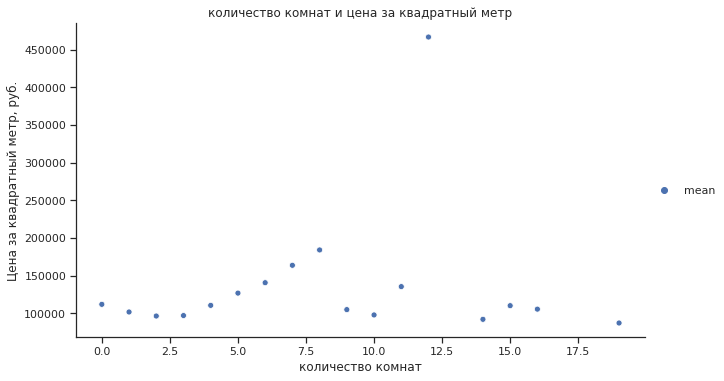

In [97]:
flats_table_paiting('rooms', 'количество комнат')

<div class="alert alert-info"> При росте числа комнат до 8 наблюдается рост цены за квадратный метр.  </div>

                         mean
                     m2_price
ceiling_height               
1.0             100000.000000
1.2              37500.000000
1.8             102500.000000
2.0              66080.303636
2.2              54166.665000
2.3              48133.334000
2.4              74909.524211
2.5              86243.414858
2.6              94522.031084
2.7             101683.081137
2.8             111573.024539
2.9             114317.628732
3.0             128489.078622
3.1             136424.569930
3.2             126077.230786
3.3             149106.435220
3.4             156930.139493
3.5             144487.502102
3.6             141104.602329
3.7             133736.766053
3.8             160421.642432
3.9             172861.441579
4.0             152573.770625
4.1             220437.540000
4.2             131926.792857
4.3             133571.430000
4.4             142090.861667
4.5             114300.732857
4.6             183000.000000
4.7             262341.270000
4.8       

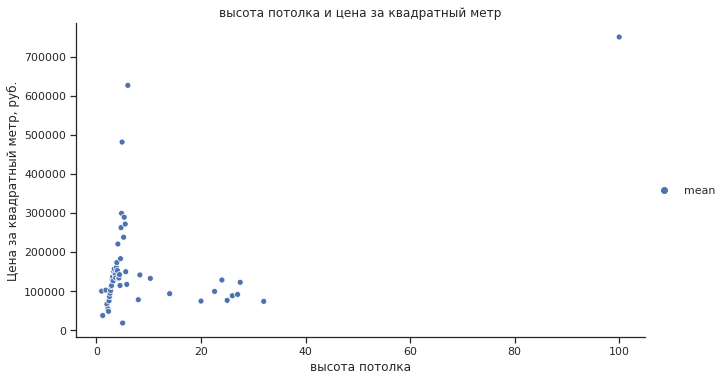

In [98]:
flats_table_paiting('ceiling_height', 'высота потолка')

<div class="alert alert-info"> При росте высоты потолка до 3 с небольшим метров наблюдается рост цены за квадратный метр. </div>

                                 mean
                             m2_price
cityCenters_nearest_km               
0.0                     188011.807093
1.0                     168177.024876
2.0                     146471.917785
3.0                     129395.032396
4.0                     137182.392063
...                               ...
60.0                     60000.000000
61.0                     64000.000000
62.0                     62000.000000
64.0                     73000.000000
65.0                     76291.667500

[61 rows x 1 columns]


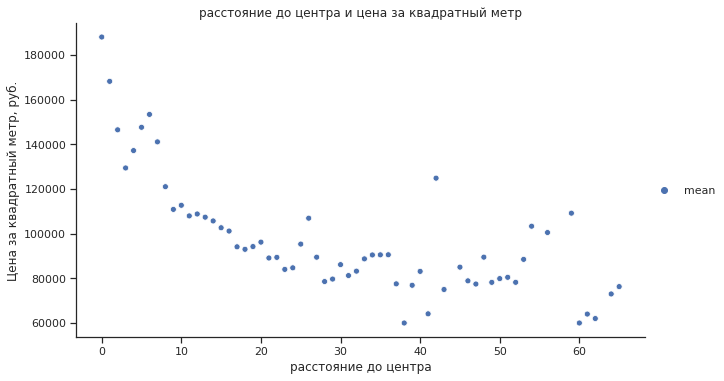

In [99]:
flats_table_paiting('cityCenters_nearest_km', 'расстояние до центра')

<div class="alert alert-info">  При увеличении расстояния до центра города цена за квадратный метр падает. </div>


                     mean
                 m2_price
flat_floor               
другой      104108.622376
первый       83064.277701
последний    93792.910658


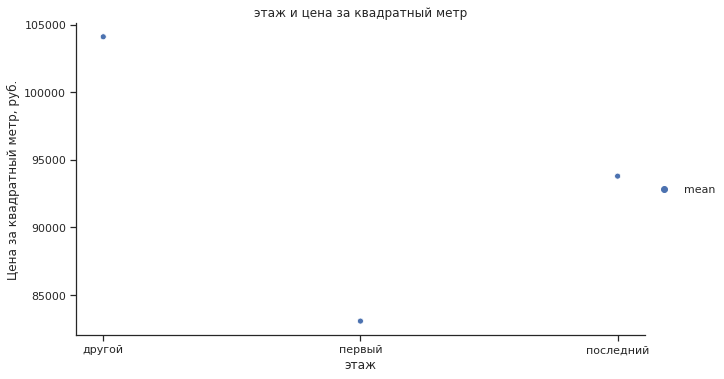

In [100]:
def floor_scatter_paiting(parametr, parametr_name):
    flat_floor_m2_price = flats_table.pivot_table(index=parametr, values='m2_price', aggfunc=['mean'])
    print(flat_floor_m2_price)
    sns.relplot(data=flat_floor_m2_price, aspect=1.8)
    plt.title(parametr_name+' и цена за квадратный метр')
    plt.ylabel('Цена за квадратный метр, руб.')
    plt.xlabel(parametr_name)
    plt.show()  
    
floor_scatter_paiting('flat_floor','этаж')

<div class="alert alert-info">  Самые недорогой квадратный метр будет в квартирах на 1 этаже, затем идут квартиры на последнем этаже. </div>

<div class="alert alert-info">  Для более подробного анализа и сравнения данных по центру Петербургу и районам избавимся от выбивающихся значений </div>

<a id='shag_5'></a>

                                 mean
                             m2_price
cityCenters_nearest_km               
0.0                     188011.807093
1.0                     168177.024876
2.0                     146471.917785
3.0                     129395.032396
4.0                     137182.392063
...                               ...
60.0                     60000.000000
61.0                     64000.000000
62.0                     62000.000000
64.0                     73000.000000
65.0                     76291.667500

[61 rows x 1 columns]


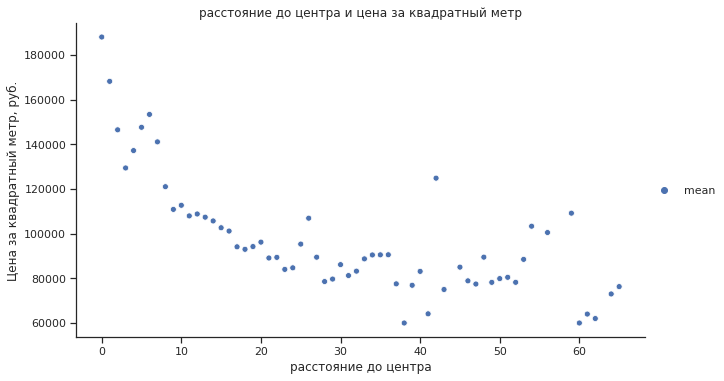

In [101]:
spb_table = flats_table.loc[flats_table['locality_name'] == 'Санкт-Петербург']

flats_table_paiting('cityCenters_nearest_km', 'расстояние до центра')

<div class="alert alert-info"> При значениях свыше 7 км начинается снижение цены недвижимости. Будем считать 7 км границей центра города. Выделим все объявления, относящиеся к центру и проверим обнаруженные закономерности. </div>

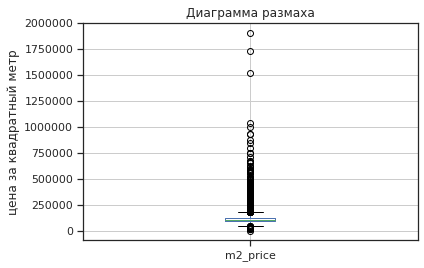

In [102]:
box_paiting('m2_price', 'цена за квадратный метр')

<div class="alert alert-info">  Выбивающиеся значения по цене за квадратный метр это значения выше 200000 руб. и ниже 50000 руб. Попробуем убрать эти значения. </div>

In [103]:
flats_table.loc[:,'m2_price'] = flats_table.loc[flats_table['m2_price'] > 50000]
flats_table.loc[:,'m2_price'] = flats_table.loc[flats_table['m2_price'] < 200000]

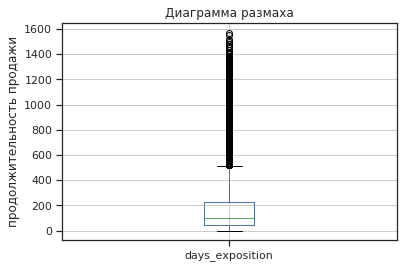

In [104]:
box_paiting('days_exposition','продолжительность продажи')

<div class="alert alert-info">  Выбивающиеся значения по длительности продаж - это значения от 420 дней. </div>

In [105]:
flats_table.loc[:,'days_exposition'] = flats_table.loc[flats_table['days_exposition'] < 420]

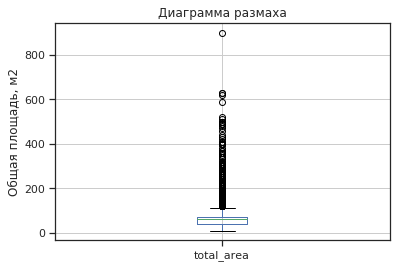

In [106]:
box_paiting('total_area', 'Общая площадь, м2')

<div class="alert alert-info">  Выбивающиеся значения по общей площади это значения выше 118 квадратных метров. </div>

In [107]:
flats_table.loc[:,'total_area'] = flats_table.loc[flats_table['total_area'] < 120]

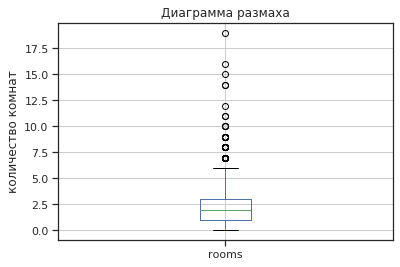

In [108]:
box_paiting('rooms', 'количество комнат')

<div class="alert alert-info"> По показателю количества комнат отсечем квартиры, в которых более 6 комнат. </div>

In [109]:
flats_table.loc[:,'rooms']  = flats_table.loc[flats_table['rooms'] < 7]

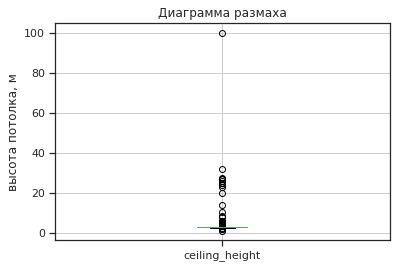

In [110]:
box_paiting('ceiling_height', 'высота потолка, м')

<div class="alert alert-info"> В основном значения высоты потолка находится в пределах от 2,3м до 3м </div>

In [111]:
spb_table = spb_table.loc[spb_table['ceiling_height'] > 2.3]
spb_table = spb_table.loc[spb_table['ceiling_height'] < 3]

<div class="alert alert-info">  Сравним значения для центрального района и остальное части города </div>

<a id='shag_6'></a>

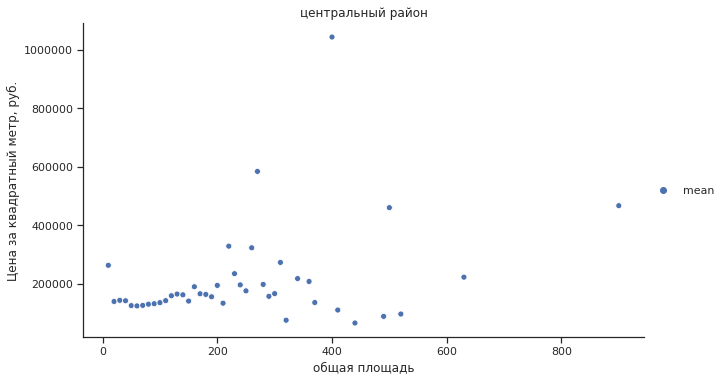

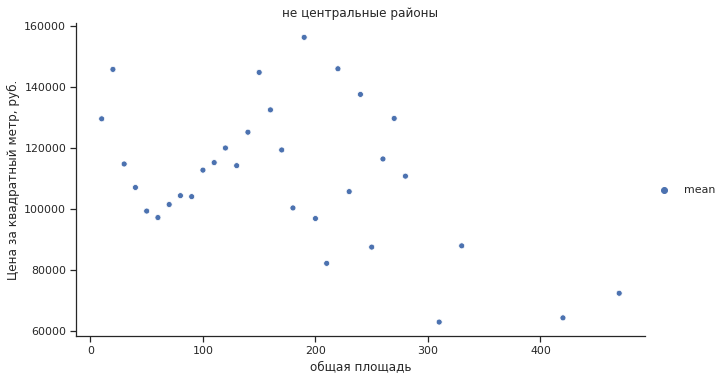

In [112]:
center_table.loc[:,'cityCenters_nearest_km'] = spb_table.loc[spb_table['cityCenters_nearest_km'] < 8]
no_center_table.loc[:,'cityCenters_nearest_km'] = spb_table.loc[spb_table['cityCenters_nearest_km'] > 7]
    
center_scatter_paiting('total_area', 'общая площадь', center_table, 'центральный район')
center_scatter_paiting('total_area', 'общая площадь', no_center_table, 'не центральные районы')

<div class="alert alert-info"> В центре города цена за квадратный метр не зависит от общей площади. В нецентральных районах квартиры площадью около 60 квадратных метров имеют более низку цену за 1 квадратный метр. </div>

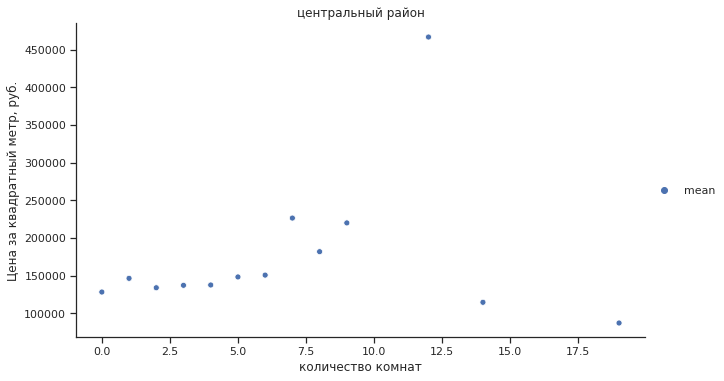

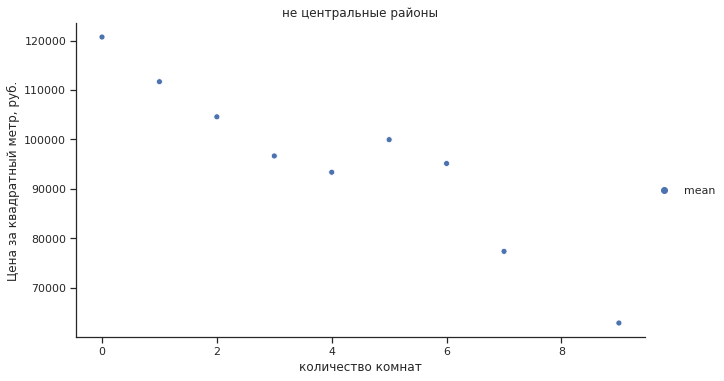

In [113]:
center_scatter_paiting('rooms', 'количество комнат', center_table, 'центральный район')
center_scatter_paiting('rooms', 'количество комнат', no_center_table, 'не центральные районы')

<div class="alert alert-info">  Вне центра при увеличении количества комнат идет снижение цены за 1 квадратный метр. В центре тенденция скорее обратная. </div>

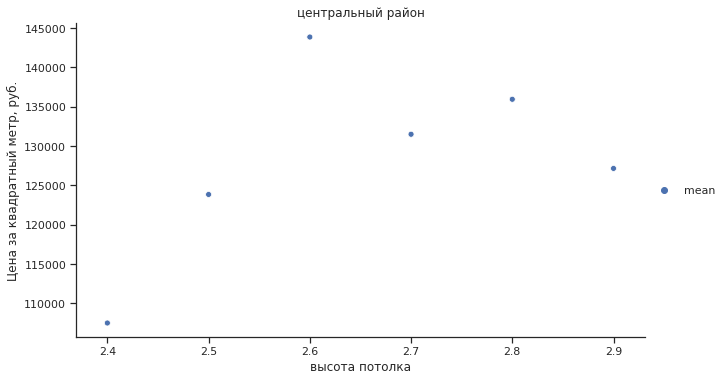

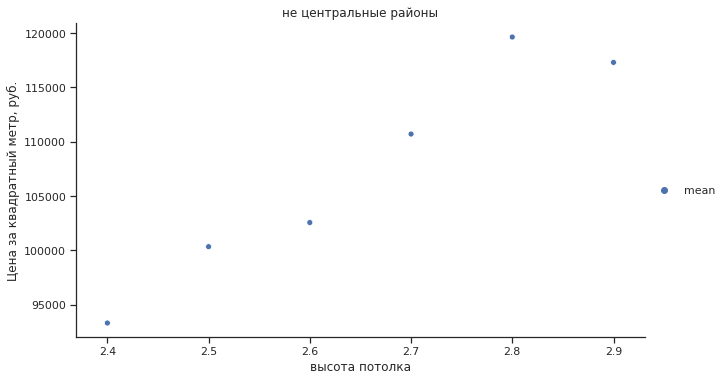

In [114]:
#spb_table['ceiling_height'] = pd.to_numeric(round(spb_table['ceiling_height'],1))
center_scatter_paiting('ceiling_height', 'высота потолка', center_table, 'центральный район')
center_scatter_paiting('ceiling_height', 'высота потолка', no_center_table, 'не центральные районы')

<div class="alert alert-info"> Вне центра городадо значения 2,75м можно наблюдать рост цены квадратного метра при увеличении высоты потолка. В центральных районах самые дорогие метры приходятся на квартиры с потолкакми 2,6м, что возможно связано с датой строительства зданий в исторической части города и их спецификой. </div>

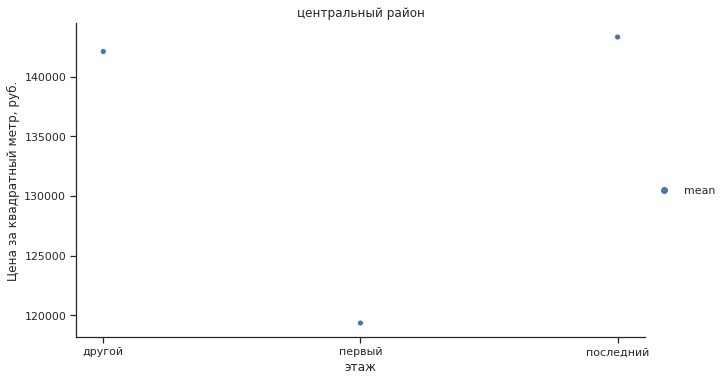

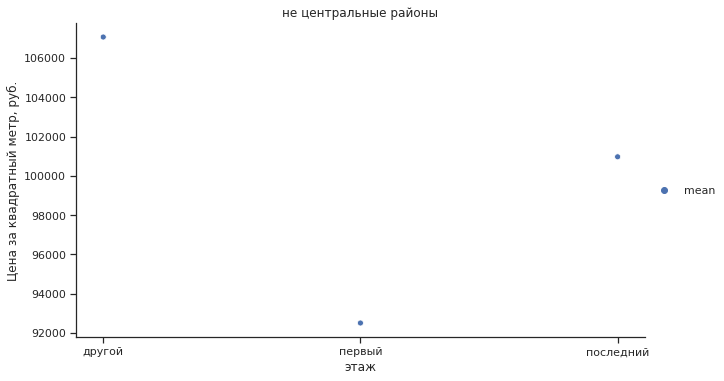

In [115]:
center_scatter_paiting('flat_floor','этаж', center_table, 'центральный район')
center_scatter_paiting('flat_floor','этаж', no_center_table, 'не центральные районы')

<div class="alert alert-info"> Квартиры на 1 этаже ценятся меньше, чем на остальных. При этом квартиры на последнем этаже в центре города стоят также, как квартиры не на крайних этажах. </div>

               mean    count
           m2_price m2_price
year                        
2014  138314.272647       68
2015  109531.499620      685
2016  108733.909956     1579
2017  107432.593919     4761
2018  111407.166252     4581
2019  118528.144830     1679


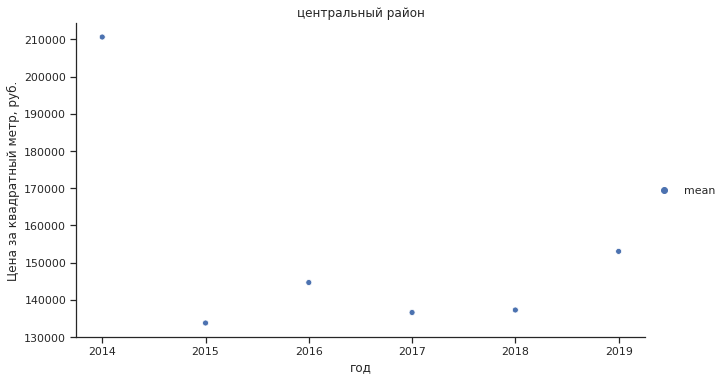

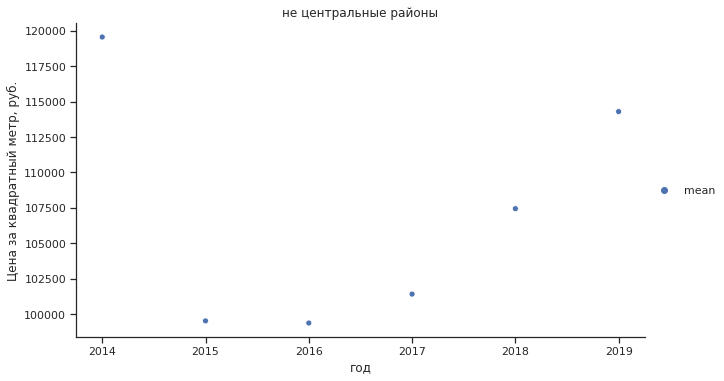

In [116]:
print(spb_table.pivot_table(index='year', values='m2_price', aggfunc=['mean', 'count']))

center_scatter_paiting('year','год', center_table, 'центральный район')
center_scatter_paiting('year','год', no_center_table, 'не центральные районы')

<div class="alert alert-info">  Начиная с 2016г. наблюдаем рост стоимости недвижимости сначала на окраинах города, затем и в центре. Данные за 2014 составляют всего 20 строк, поэтому про 2014 год однозначный вывод сделать нельзя. </div>

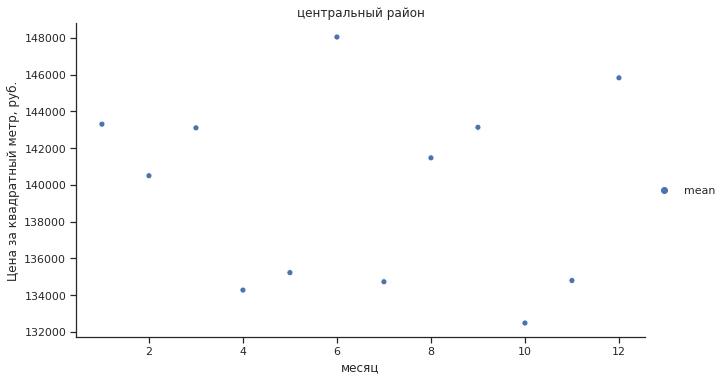

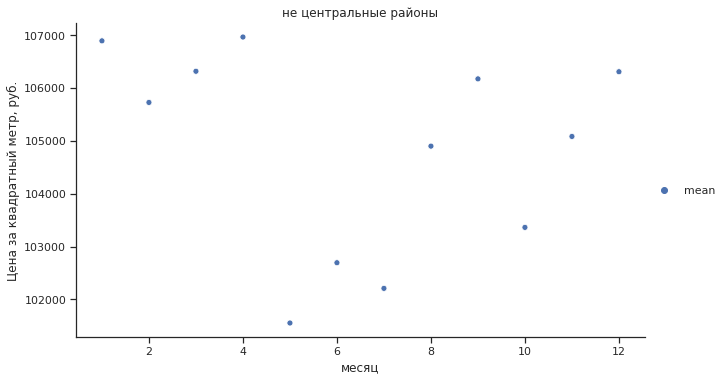

In [117]:
center_scatter_paiting('month','месяц', center_table, 'центральный район')
center_scatter_paiting('month','месяц', no_center_table, 'не центральные районы')

<div class="alert alert-info">  В зависимости от месяца цена меняется хаотично. </div>

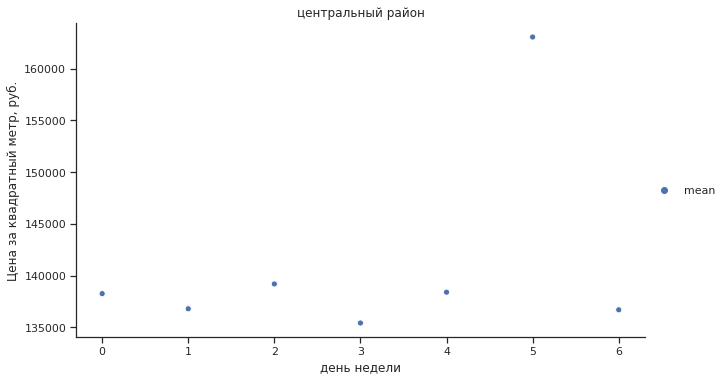

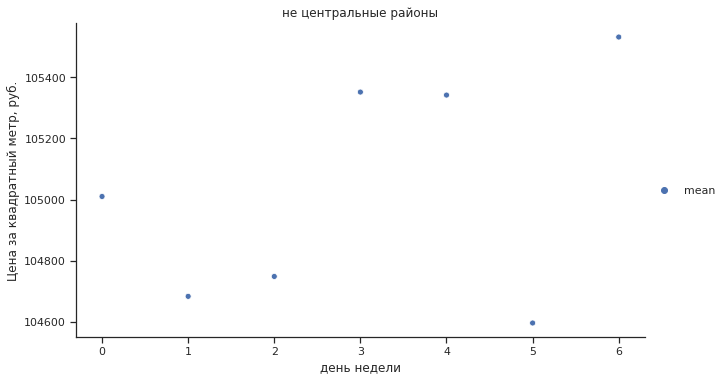

In [118]:
center_scatter_paiting('dayofweek','день недели', center_table, 'центральный район')
center_scatter_paiting('dayofweek','день недели', no_center_table, 'не центральные районы')

<div class="alert alert-info">  В зависимости от дня недели цена меняется незначительно и хаотично. </div>

In [119]:
median_m2_price = flats_table.pivot_table(index='locality_name', values='m2_price', aggfunc=['count', 'median'])
median_m2_price.columns = ['count', 'median']
median_m2_price = median_m2_price.sort_values('count', ascending=False).head(10)
median_m2_price.sort_values('median', ascending=False)

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,count,median
Санкт-Петербург,15165,105000.000
Пушкин,367,100714.290
посёлок Парголово,323,91750.000
деревня Кудрово,299,90833.330
посёлок Мурино,520,85000.000
Петергоф,200,83333.330
посёлок Шушары,436,78166.665
Колпино,334,75000.000
Гатчина,288,70000.000
Всеволожск,367,66333.330


<div class="alert alert-info"> Среди самых популярных населенных пунктов саммые дорогие квартиры в Санкт-Петербурге, Пушкине, Кудрово и Парголово. Самые не дорогие в Гатчине, Всеволожске и Выборге.  </div>


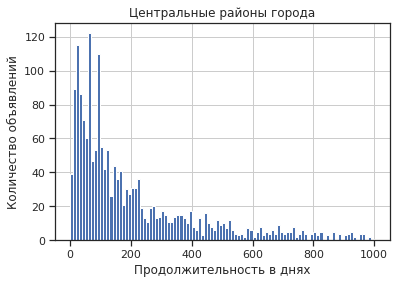

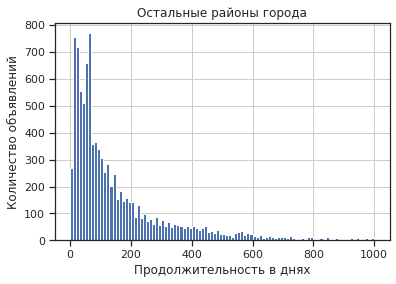

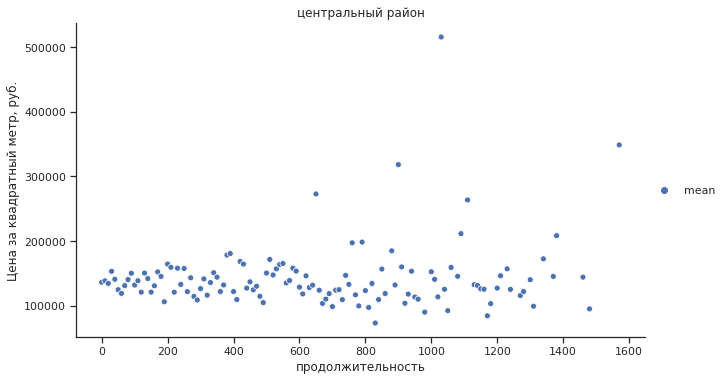

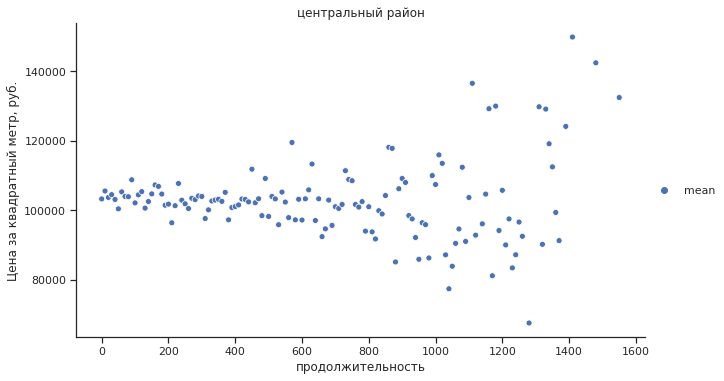

In [120]:
center_table.hist('days_exposition', bins =100, range = (0,1000))
plt.title('Центральные районы города')
plt.xlabel('Продолжительность в днях')
plt.ylabel('Количество объявлений')
plt.show()
no_center_table.hist('days_exposition', bins =100, range = (0,1000))
plt.title('Остальные районы города')
plt.xlabel('Продолжительность в днях')
plt.ylabel('Количество объявлений')
plt.show()
center_scatter_paiting('days_exposition','продолжительность', center_table, 'центральный район')
center_scatter_paiting('days_exposition','продолжительность', no_center_table, 'центральный район')

<div class="alert alert-info"> Быстрой продажей можно считать продажу в течение 21 дня, а долго - свыше 63 дней. </div>


<a id='shag_5'></a>

### Шаг 5. Общий вывод

Самые дорогие квартиры в Санкт-Петербурге, Пушкине, Кудрово и Парголово. Самые не дорогие в Гатчине, Всеволожске и Выборге.
Центром можно считать расстояние до 7 км включительно.
Цена за квадратный метр зависит от: этажа(первый самый дешевый, затем идет последний), удаленности от центра. При увеличении числа комнат до 4 (а в центре города до 6) цена за один квадратный метр снижается.
От дня недели и месяца цена на недвижимость не зависит. 
С 2016 года наблюдается рост цен на недвижимость. 
Цена за квадратный метр не зависит от: высоты потолков(при условии, что высота не ниже значения 2,75м).
При росте параметра общей площади до значения 170 метров цена квадратного метра возрастает. В дальнейшем, при очень больших значениях цена становится ниже.
Быстро проданной можно считать квартиру, проданную в течение 21 дней, медленно проданную - более 63 дней.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод